# Защита данных клиентов страховой компании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-библиотек" data-toc-modified-id="Выгрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выгрузка библиотек</a></span></li><li><span><a href="#Выгрузка-и-рассмотрение-данных" data-toc-modified-id="Выгрузка-и-рассмотрение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выгрузка и рассмотрение данных</a></span></li><li><span><a href="#Выбор-признаков" data-toc-modified-id="Выбор-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выбор признаков</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разделение выборок</a></span></li><li><span><a href="#Проверка-на-исходных-данных-(матрица-признаков-$X$)" data-toc-modified-id="Проверка-на-исходных-данных-(матрица-признаков-$X$)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка на исходных данных (матрица признаков $X$)</a></span></li><li><span><a href="#Проверка-на-преобразованных-данных-(матрица-признаков-$I$)" data-toc-modified-id="Проверка-на-преобразованных-данных-(матрица-признаков-$I$)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Проверка на преобразованных данных (матрица признаков $I$)</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании-заказчика, разработав такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Также необходимо обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Выгрузка библиотек

Выгрузим необходимые для дальнейшей работы библиотеки:

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns  

### Выгрузка и рассмотрение данных

Выгрузим наш датасет и выведем первые 10 строк датасета

In [2]:
df = pd.read_csv('/datasets/insurance.csv')


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [3]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>

Index: 8 entries, count to max

Data columns (total 5 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Пол                8 non-null      float64

 1   Возраст            8 non-null      float64

 2   Зарплата           8 non-null      float64

 3   Члены семьи        8 non-null      float64

 4   Страховые выплаты  8 non-null      float64

dtypes: float64(5)

memory usage: 384.0+ bytes


Данные не имеют пропусков, тип - float64 здесь приемлем.

In [4]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Как мы видим - наш датасет состоит из 5 колонок (Пол, Возраст, Зарплата, Члены семьи и Страховые выплаты) и 4999 строк по каждому из клиентов.

### Выбор признаков

Для работой с моделью линейной регрессии нам необходимо выделить целевой признак и сопутствующие признаки из датасета. В нашей задаче целевым признаком будет являться колонка "Страховые выплаты", а сопутствующими - оставшийся датасет. Запишем это в коде.

In [5]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']
features.shape, target.shape

((5000, 4), (5000,))

Для модели линейной регрессии в этом проекте важно, чтобы не было мультиколлинеарности, то есть ситуации, когда две независимые переменные имеют сильную корреляцию.

Чтобы проверить взаимосвязь между признаками выведем коэффициенты корреляции на экран и построим heatmap корреляции с использованием seaborn.

                  Пол   Возраст  Зарплата  Члены семьи

Пол          1.000000  0.002074  0.014910    -0.008991

Возраст      0.002074  1.000000 -0.019093    -0.006692

Зарплата     0.014910 -0.019093  1.000000    -0.030296

Члены семьи -0.008991 -0.006692 -0.030296     1.000000


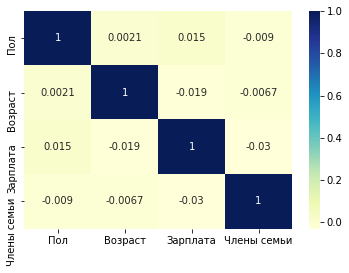

In [6]:
print(features.corr())  
    
features_plot = sns.heatmap(features.corr(), cmap="YlGnBu", annot=True)  
    


Как видно из полученного графика - зависимость между признаками нормальная. В противном случае, модель выдавала бы слишком высокие значения предсказаний, что не очень хорошо для данных, которые нужно зашифровать.

## Умножение матриц

Проверим - изменится ли значение предсказаний линейной регрессии $a$ при умножении матрицы признаков на матрицу $P$? а также ответим на вопрос в как соотносятся между собой $w$ и $w_{p}$?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении матрицы признаков на обратную - значения предсказания модели линейной регрессии не меняются.

**Обоснование:** Пусть матрица $I = XP$ (матрица признаков, умноженная на матрицу, на которую умножаются признаки)

Докажем, что предсказания ($а$) матрицы признаков равны предсказаниям ($а_{p}$) преобразованной матрицы.

Из условия задачи видим:

$
a = Xw
$

$
w = (X^T X)^{-1} X^T y
$

Следовательно

$
w_{p} = (I^T I)^{-1} I^T y
$

Подставим в формулу вместо матрицы $I$ выражение $XP$, так как новая матрица $I = XP$. Уравнение примет следуюищй вид:

$
w_{p} = ((XP)^T XP)^{-1} (XP)^T y
$

Для решения воспользуемся формулами матриц: $(AB)^{-1} = B^{-1}A^{-1}, (AA)^{-1} = A^{-1}A = E, (AB)^T = B^T A^T $

$
w_{p} = ((XP)^T XP)^{-1} (XP)^T y = ((P^T X^T XP)^{-1} (XP)^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} (XP)^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} X^T y
$

Найдем как соотносятся $\frac{W}{w_{p}}$:

$
\frac{W}{w_{p}} = \frac{(X^T X)^{-1} X^T y}{P^{-1} (X^T X)^{-1} X^T y} = \frac{1}{P^{-1}} = P
$

Делаем вывод, что формулы обучения соотносятся как перемножение исходной матрицы на матрицу $P$ - что, собственно, мы и делали.

Теперь посмотрим, как соотносятся предсказания $a$ и $a_{p}$:

$
a = X(X^T X)^{-1} X^T y
$

$
a_{p} = XPw_{p} = XP P^{-1} (X^T X)^{-1} X^T y = X(X^T X)^{-1} X^T y = a
$

Следовательно, можно сделать вывод, что при умножении матрицы признаков на матрицу $P$, значение предсказания модели не меняется.

## Алгоритм преобразования

Чтобы повысить безопасность данных воспользуемся алгоритмом шифрования. Он будет представлять из себя умножение матрицы признаков на обратную ей матрицу. 

Чтобы вдальнейшем дешифровать алгоритм - необходимо будет выполнить эту операцию в обратном порядке.

Сформулируем алгоритм преобразования.

**Алгоритм**

- 1. Составляем случайную матрицу $Y$ размерностью $(n,n)$ - такой же, ка и матрица $X$
- 2. Проверяем ее на обратимость
- 3. Если матрица необратима - генерируем ее до тех пор, пока не получим обратимую
- 4. Составляем преобразованную матрицу признаков $I = XY$
- 5. Применяем модель линейной регрессии на преобразованной матрице $I$

**Обоснование**

Обратная матрица будет генерироваться, как говорилось выше, случайно. Формула необходимой нам матрицы, которую мы будем вводить в линейную регрессию будет иметь вид $I$ = $X$$Y$, а учитывая, что сгенерированная матрица $Y$ будет иметь схожую с нашей исходной матрицей признаков $X$ размерность, то, по формуле умножения матриц, матрица $I$  будет иметь ту же размерность, что и матрица $X$.

## Проверка алгоритма

### Разделение выборок

Перед началом умножения и проверки алгоритма разделим данные на обучающую и тестовую выборки методом train_test_split в пропорциях 75/25

In [7]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state = 1234)

Выборки разделены на тренировочную и тестовую. Перейдем к обучению алгоритма сначала на исходных, а затем на новых данных.

### Проверка на исходных данных (матрица признаков $X$)

Обучим модель на исходных данных, чтобы вдальнейшем сравнить метрику R2 на ней и на модели, которая будет обучаться на данных после умножения матриц признаков.

In [8]:
model = LinearRegression()
model.fit(features_train, target_train)
print('Метрика R2 на исходных данных:', r2_score(target_test, model.predict(features_test)))

Метрика R2 на исходных данных: 0.42496205427835687


### Проверка на преобразованных данных (матрица признаков $I$)

Перед тем, как приступить к проверке алгоритма, необходимо сгенерировать случайную матрицу $Y$ (обратную матрице $X$), а затем перемножить их, чтобы получить необходимую нам матрицу $I$. Приступим.

Создадим функцию new_features, которая:
- На вход принимает признаки для регрессии (нашу матрицу признаков $X$), 
- Создает случайную матрицу $Y$ такой же размерности, как исходная матрица $X$, 
- Перемножает матрицу признаков $X$ на обратную ей матрицу $Y$,
- Выводит получившуюся матрицу с преобразованными признаками (матрицу $I$)

In [9]:
def new_features(features):
    ft = features
    n = features.shape[1] #задаем размерность случайной матрицы 
    np.random.seed(12345)
    Y = np.random.randint(1, 10, (n,n))
    INV = np.linalg.det(Y) #проверяем матрицу на обратимость (нет ошибки - обратима)
    I = ft @ Y
    return I

In [11]:
features = new_features(features) #передадим новые признаки перед проверкой модели

Так же, как и в прошлом шаге - разделим выборку на тренировочную и тестовую в пропорции 75/25:

In [15]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state = 1234)

Обучим модель линейной регрессии на преобразованных данных и выведем метрику R2:

In [16]:
model = LinearRegression()
model.fit(features_train, target_train)
print('Метрика R2 на преобразованных данных:', r2_score(target_test, model.predict(features_test)))

Метрика R2 на преобразованных данных: 0.4249620542782261


Как мы видим из полученных данных - метрика R2 модели на исходных данных совпадает с метрикой R2 на преобразованных данных и составляет 0.4249. Можно сделать вывод, что алгоритм работает.

## Вывод

Перед нами стояла задача по защите данные клиентов страховой компании, которая заключалась в разработке такого метода преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Также было необходимо обосновать корректность работы найденного алгоритма.

В начале мы выгрузили и проверили данные - оказалось, что предобработка им не требуется. Данные без пропусков, с подходящим для работы типом данных. Затем мы выделили признаки - в нашей задаче целевым признаком стала колонка "Страховые выплаты" датасета, а сопутствующими - остальной датасет.

Затем нам необходимо было математически доказать, что при умножении матрицы признаков на матрицу $P$ значения предсказаний не поменяются. Для этого мы, путем вычислений, доказали, что предсказания $a$ на исходной матрице $X$ будут равны предсказаниям $a_p$ на матрице $I$, то есть:

$
a_{p} = XPw_{p} = XP P^{-1} (X^T X)^{-1} X^T y = X(X^T X)^{-1} X^T y = a
$

А следовательно, эту особенность можно будет использовать для защиты данных пользователей.

Далее нам необходимо было предложить алгоритм защиты данных, при котором показатели качества модели (в нашем случае метрика R2) не меняются. Таким алгоритмом был выбран алгоритм, который:

- Составляет случайную матрицу $Y$ размерностью $(n,n)$ - такой же, ка и матрица $X$
- Проверяет ее на обратимость
- Если матрица необратима - генерирует ее до тех пор, пока не получится обратимая
- Составляет преобразованную матрицу признаков $I = XY$
- Применяет модель линейной регрессии на преобразованной матрице $I$

Для этого мы написали функцию, которая: 

- на вход принимает признаки для регрессии (нашу матрицу признаков $X$), 
- создает случайную матрицу $Y$ такой же размерности, как исходная матрица $X$, 
- перемножает матрицу признаков $X$ на обратную ей матрицу $Y$,
- выводит получившуюся матрицу с преобразованными признаками (матрицу $I$).

Затем мы преобразовали наши признаки с помощью этой функции и обучили на них модель Линейной регрессии. По полученным результатам, метрика R2, полученная на исходных данных (этот шаг провели перед созданием функции) и полученная на преобразованных данных (с помощью функции) оказались равны (составили 0.4249).

На основании вышеизложенного можно сделать вывод, что алгоритм преобразования, заключающийся в умножении матрицы признаков (данных клиентов) на матрицу, обратную ей, эффективен, при этом качество моделей не отличается друг от друга.